In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

In [2]:
ihdp_df = pd.read_csv('results/ihdp_no_params_baselines.csv')

In [9]:
ihdp_df['causal_model_name'].value_counts()

SLearner           66
TLearner           66
XLearner           66
LinearDML          66
SparseLinearDML    66
KernelDML          66
CausalForestDML    66
Name: causal_model_name, dtype: int64

In [20]:
meta_models = ['SLearner', 'TLearner', 'XLearner']
results_df = pd.DataFrame(columns=['causal_model_name', 'tao_risk'])

# Loop through each causal model and get the 30 lowest tao_risk scores
for causal_model in meta_models:
    subset_df = ihdp_df[ihdp_df['causal_model_name'] == causal_model]
    sorted_df = subset_df.sort_values(by=['tao_risk']).head(20)
    meta_results_df = pd.concat([results_df, sorted_df])

In [21]:
causal_models = ['LinearDML', 'SparseLinearDML',
       'KernelDML', 'CausalForestDML']

results_df = pd.DataFrame(columns=['causal_model_name', 'tao_risk'])

# Loop through each causal model and get the 30 lowest tao_risk scores
for causal_model in causal_models:
    subset_df = ihdp_df[ihdp_df['causal_model_name'] == causal_model]
    sorted_df = subset_df.sort_values(by=['tao_risk']).head(20)
    results_df = pd.concat([results_df, sorted_df])

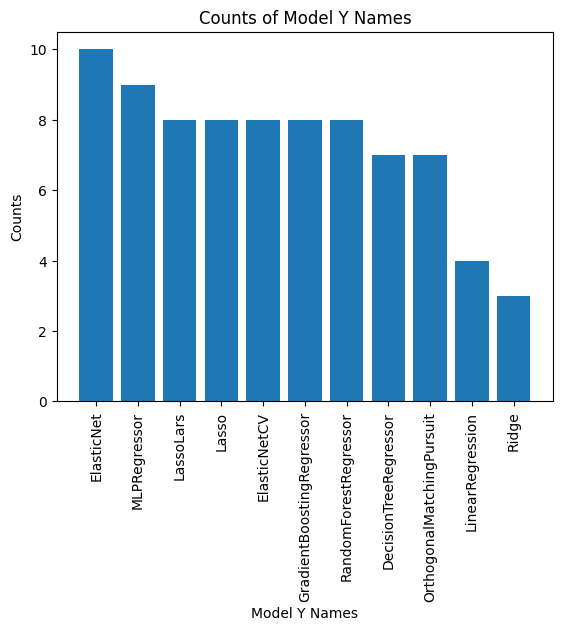

In [22]:
# Get the counts of each model_y name
counts = results_df['model_y'].value_counts()

# Create a bar plot of the counts
plt.bar(counts.index, counts.values)

# Set the title and axis labels
plt.title('Counts of Model Y Names')
plt.xlabel('Model Y Names')
plt.ylabel('Counts')

# Rotate the x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

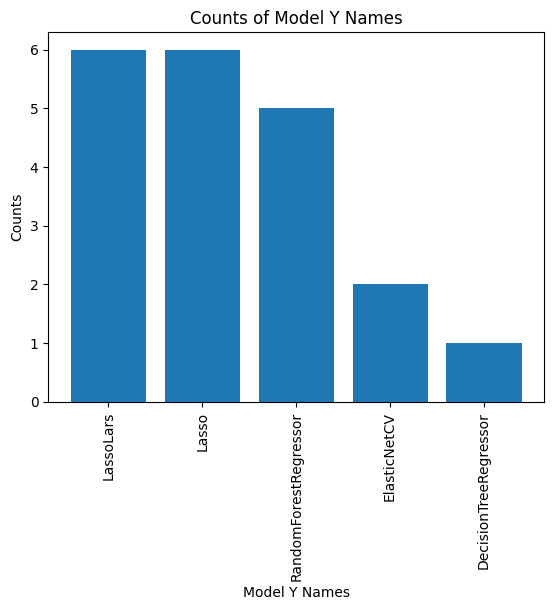

In [23]:
# Get the counts of each model_y name
counts = meta_results_df['model_y'].value_counts()

# Create a bar plot of the counts
plt.bar(counts.index, counts.values)

# Set the title and axis labels
plt.title('Counts of Model Y Names')
plt.xlabel('Model Y Names')
plt.ylabel('Counts')

# Rotate the x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

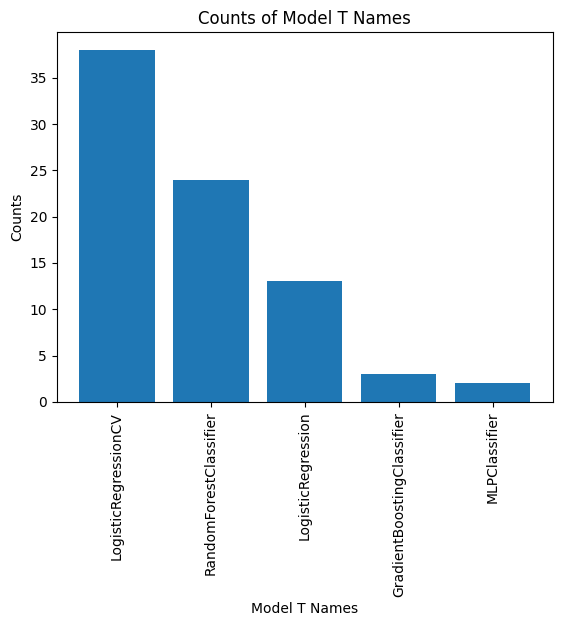

In [24]:
# Get the counts of each model_y name
counts = results_df['model_t'].value_counts()

# Create a bar plot of the counts
plt.bar(counts.index, counts.values)

# Set the title and axis labels
plt.title('Counts of Model T Names')
plt.xlabel('Model T Names')
plt.ylabel('Counts')

# Rotate the x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [27]:
# Create the box plot using Plotly Express
fig = px.box(results_df, x='model_y', y='tao_risk')

# Set the title and axis labels
fig.update_layout(title='Tau Risk by Model Y',
                  xaxis_title='Model Y',
                  yaxis_title='Tau Risk')

# Show the plot
fig.show()

In [30]:
# Create the box plot using Plotly Express
fig = px.box(results_df, x='model_t', y='tao_risk')

# Set the title and axis labels
fig.update_layout(title='Tau Risk by Model Y',
                  xaxis_title='Model Y',
                  yaxis_title='Tau Risk')

# Show the plot
fig.show()

In [31]:
df = results_df

In [33]:
import plotly.graph_objs as go
import numpy as np

# One-hot encode model_y and model_t
model_y_ohe = pd.get_dummies(df['model_y'])
model_t_ohe = pd.get_dummies(df['model_t'])

# Calculate the average tao_risk for each combination of model_y and model_t
grouped_df = df.groupby([df['model_y'], df['model_t']])['tao_risk'].agg(['mean', 'std']).reset_index()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(x=model_y_ohe.columns,
                                 y=model_t_ohe.columns,
                                 z=grouped_df['mean'].values.reshape(len(model_t_ohe.columns), len(model_y_ohe.columns)),
                                 zmin=0, zmax=1,
                                 colorscale='Viridis'))

# Add the standard deviation as error bars
x = np.repeat(grouped_df['model_y'].values, 2)
y = np.repeat(grouped_df['model_t'].values, 2)
error_y = np.concatenate([grouped_df['mean'] - grouped_df['std'], grouped_df['mean'] + grouped_df['std']])

fig.add_trace(go.Scatter(x=x,
                         y=y,
                         mode='lines+markers',
                         line=dict(color='black', width=1),
                         marker=dict(size=5),
                         error_y=dict(type='data', array=error_y, thickness=1.5)))

# Set the title and axis labels
fig.update_layout(title='Average Tau Risk by Model Y and Model T',
                  xaxis_title='Model Y',
                  yaxis_title='Model T')

# Show the plot
fig.show()


ValueError: cannot reshape array of size 36 into shape (5,11)